# Lecture 15: Matrix functions and matrix equations

## Previous lecture
`
- Toeplitz matrices, circulant matrices, FFT

## Today lecture

- Matrix functions and matrix equations

## Outline of this part

- What is a matrix function
- Matrix exponential
- (Some) applications

Book to read: [Nick Higham, Functions of matrices](http://www.google.ru/books?hl=ru&lr=&id=2Wz_zVUEwPkC&oi=fnd&pg=PR3&dq=Higham+matrix+function&ots=pTt6fpLGRX&sig=DgUuX-SpBZGin8CFUo-4MYnOcHE&redir_esc=y#v=onepage&q=Higham%20matrix%20function&f=false)

## The simplest matrix function: matrix polynomial

It is very easy to define a matrix polynomial as  
$$
 P(A) = \sum_{k=0}^n c_k A^k.
$$
**Side-note:** [Hamilton-Cayley theorem](https://en.wikipedia.org/wiki/Cayley%E2%80%93Hamilton_theorem) states that $F(A) = 0$ where $F(\lambda) = \det(A - \lambda I)$, thus all matrix polynomials have degree $\leq n$.

## Matrix polynomials as building blocks
We can define a function of the matrix by **Taylor series**:  
$$
   f(A) = \sum_{k=0}^{\infty} c_k A^k.
$$
The convergence is understood as the convergence in some **matrix norm**.  

Example of such series is the **Neumann series**  
$$
  (I - F)^{-1} = \sum_{k=0}^{\infty} F^k,
$$
which is well defined for $\rho(F) < 1$.

## Matrix exponential series
The most well-known matrix function is **matrix exponential**. In the scalar case,  
$$
   e^x = 1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \ldots = \sum_{k=0}^{\infty} \frac{x^k}{k!},
$$
and it directly translates to the matrix case:  
$$
    e^A = \sum_{k=0}^{\infty} \frac{A^k}{k!},
$$
the series that always converges, because the series

$$\sum_{k=0}^{\infty} \frac{\Vert A \Vert^k}{k!} = e^{\Vert A \Vert}.$$

## Why matrix exponential is important
A **lot of** practical problems are reduced to a system of linear ODEs of the form  
$$
   \frac{dy}{dt} = Ay, \quad y(0) = y_0.
$$


## ODE and matrix exponentials

Given the equation $$\frac{dy}{dt} = Ay, \quad y(0) = y_0$$.

The formal solution is given by $y(t) = e^{At} y_0$, so if we know  

$e^{At}$ (or can compute matrix-by-vector product fast) there is a big gain over the  

time-stepping schemes.

Indeed,

$$\frac{d}{dt} e^{At} = \frac{d}{dt} \sum_{k=0}^{\infty} \frac{t^k A^k}{k!} = \sum_{k=1}^{\infty} \frac{t^{k-1} A^{k}}{(k-1)!}  = A e^{At}.$$

## Sidenote: matrix exponential and time stepping

Matrix exponential can be much better than solving using, say, Euler scheme:

$$\frac{dy}{dt} \approx \frac{y_{k+1} - y_k}{\tau} = A y_k, \quad y_{k+1} = y_k + \tau A y_k,$$

if we know how to compute the product of the matrix exponential by vector using only matrix-by-vector product.

For dense matrices matrix exponential also provides **exact** answer to the ODE for any $t$, compared to the **approximation** by time-stepping schemes.

## How to compute matrix functions, including exponential?

There are many ways, even for the matrix exponential!

See [C. Van Loan, C. Moler, Nineteen Dubious Ways to Compute the Exponential of a Matrix, Twenty-Five Years Later](http://www.cs.cornell.edu/cv/researchpdf/19ways+.pdf)

The simplest way is to diagonalize the matrix:  
$$
  A = S \Lambda S^{-1}.
$$
where the columns of $S$ are **eigenvectors** of the matrix $A$,  then  

$$
   F(A) = S F(\Lambda) S^{-1}.
$$
Problem: **diagonalization can be unstable!** (and not every matrix is diagonalizable)

Let us look how matrices are diagonalizable:

In [2]:
import numpy as np
eps = 0.5
p = 4
a = np.eye(p)
for i in xrange(p-1):
    a[i, i+1] = 1
    
a[p-1, 2] = eps
a = np.array(a)
val, vec = np.linalg.eig(a)
#print a
print np.linalg.norm(a - vec.dot(np.diag(val)).dot(np.linalg.inv(vec)))
#print 'S * D * S^{-1}:' 
#print vec.dot(np.diag(val)).dot(np.linalg.inv(vec))
print a

2.2360679775
[[ 1.   1.   0.   0. ]
 [ 0.   1.   1.   0. ]
 [ 0.   0.   1.   1. ]
 [ 0.   0.   0.5  1. ]]


Now we can compute a function for **perturbed Jordan block.**

In [5]:
import numpy as np
eps = 1e-12
p = 5
a = np.eye(p)
for i in xrange(p-1):
    a[i, i+1] = 1
    
a[p-1, 0] = eps
a = np.array(a)
val, vec = np.linalg.eig(a)
print np.linalg.norm(a - vec.dot(np.diag(val)).dot(np.linalg.inv(vec)))

fun = lambda x: np.exp(x)

#Using diagonalization
fun_diag = vec.dot(np.diag(fun(val))).dot(np.linalg.inv(vec))


#Using Schur
import scipy
fun_m = scipy.linalg.expm(a)
np.linalg.norm(fun_m - fun_diag)

1.17945821016e-07


3.9408378258934027e-07

## How funm function works
The exponential of a matrix is a special function, so there are special methods for its computation.  

For a general function $F$,  there is a beautiful **Schur-Parlett algorithm**, which is based on the **Schur theorem**

## Schur-Parlett algorithm

Given a matrix $A$ we want to compute $F(A)$, and we only can evaluate $F$ at **scalar points**.  
First, we reduce $A$ to the **triangular form** as  
$$
   A = U T U^*.
$$
Therefore,  $F(A)=U F(T) U^*$

We only need to compute the function of triangular matrices.

## Computing functions of triangular matrices
We know values on the diagonals:  
and $$F_{ii} = F(T_{ii}),$$
and also we know that
$$F T = T F:$$

the matrix function commutes with the matrix itself. The function of a triangular matrix is a triangular matrix as well.
Using the known values on the diagonal and the commutativity property, we get the diagonals of the matrix one-by-one:


$$f_{ij} = t_{ij} \frac{f_{ii} - f_{jj}}{t_{ii} - t_{jj}} + \sum_{k=i+1}^{j-1} \frac{f_{ik} t_{kj} - t_{ki}f_{kj}}{t_{ii} - t_{jj}}.$$

## Matrix functions: definition

One way to define a matrix function $f(A)$ is to use **Jordan canonical form**.

A much more elegant way is to use **Cauchy integral representation:**

$$
    f(A) = \int_{\Gamma} f(z) (zI - A)^{-1} dz,
$$
where $f(z)$ is analytic on and inside a closed contour $\Gamma$ that encloses the spectrum of $A$.

This definition can be generalized to the **operator case.**

## Important matrix functions

- Matrix exponential, used to solve $\frac{dy}{dt} = Ay$ in the "explicit" way, $y = y_0 e^{At}.$
- $\cos(A), \sin(A)$ used to solve wave equation $\frac{d^2 y}{dt^2} + Ay = 0.$
- Sign function, $\mathrm{sign}(A)$, used to compute **spectral projections.**
- Inverse square root $A^{-1/2}$ used in many places, for example, to generate samples from a Gaussian distributions

## Matrix exponential

The matrix exponential is given by the following series:

$$e^A = I + A + \frac{1}{2} A^2 + \frac{1}{3!} A^3 + \ldots$$


This series is a bad idea (even for a scalar case, can you guess why?)

This form for $e^A$ almost assumes a **Krylov method** for the evaluation of $e^{At} y_0,$ by the way.

In [8]:
import numpy as np

x = -5.0 #Point
k = 100 #Number of terms
b = 1.0
x0 = x
for i in range(1, k):
    b += x0
    x0 *= x/(i+1)
    
print 'Error in the exponent:', (b - np.exp(x))/np.exp(x)

Error in the exponent: -1.23063868212e-13


## Series convergence
The series convergence for the matrix exponential can be slow for large $x!$ (and slow for big norm).

What we can do?

## Method 1: Krylov method

We can use the idea of Krylov method: using the Arnoldi method, generate the orthogonal basis in the Krylov subspace,

and compute (it can be used in general for any function)

$$ f(A) \approx f(Q H Q^*) = Q f(H) Q^*,$$

where $H$ is a small upper Hessenberg matrix, for which we can use, for example, the **Schur-Parlett algorithm.**

The convergence of the Krylov method can be quite slow: it is actually a **polynomial approximation** to a function.

And convergence of polynomial approximation to the matrix function **can be slow.**

**Idea:** Replace by rational approximation:

## Pade approximations
Matrix exponential is well approximated by **rational function**:  

$$\exp(x) \approx \frac{p(x)}{q(x)},$$

where $p(x)$ and $q(x)$ are polynomials

and computation of a rational function of a matrix is reduced to **matrix-matrix products** and m**matrix inversions**.  

The rational form is also very useful when only a product of a matrix exponential by vector is needed, since  

evaluation reduces to **matrix-by-vector products** and **linear systems solvers**

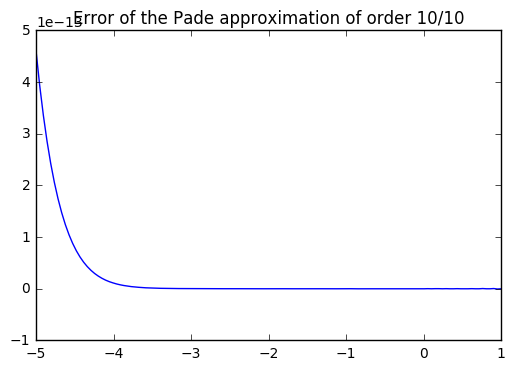

In [8]:
#Computing Pade approximant
import numpy as np
import mpmath
%matplotlib inline
from mpmath import pade, taylor, polyval
import matplotlib.pyplot as plt
x = np.linspace(-5, 1, 128)
a = taylor(mpmath.exp, 0, 100) #Taylor series
k1 = 10
k2 = 10
p, q = pade(a, k1, k2) #Pade approximant
plt.plot(x, polyval(p[::-1], x)/polyval(q[::-1], x) - np.exp(x))
plt.title('Error of the Pade approximation of order {0:d}/{1:d}'.format(k1, k2) )

## Scaling & squaring algorithm

The "canonical algorithm" for the computation of the matrix exponential also relies on **scaling** of the matrix $A:$

$$\exp(A) = \exp(A/2^k)^{(2^k)}.$$

The matrix then can have a small norm, thus:

- Scale the matrix as $B := A/2^k$ to make it norm less than $1$.
- Compute exponent of $C = e^B$ by a **Pade approximant**
- Square $e^A \approx C^{(2^k)}$ in $k$ matrix-by-matrix products.

## Large-scale matrix exponentials

Large-scale matrices obviously do not allow for efficient scaling-and-squaring (need to work with dense matrices), 

thus we can use **Krylov methods** or (better) Rational Krylov methods.

The idea of a rational Krylov subspace is motivated by the idea of rational approximation instead of polynomial approximation.

Krylov methods rely on polynomial approximations

## Rational Krylov subspaces

The simplest (yet efficient) approach is based on the so-called **extended Krylov subspaces:**

$$KE(A, b) = \mathrm{Span}(\ldots, A^{-2} b, A^{-1} b, b, A b, A^2 b, \ldots)$$

At each step you add a vector of the form $A w$ and $A^{-1} w$ to the subspace, and orthogonalize the result (**rational Arnoldi method**).

I.e., we need only linear system solver for one step, but since the matrix $A$ is fixed, we can **factorize it** once

## Rational Krylov methods

Rational Krylov methods are the most efficient for the computation of matrix functions:

we construct an orthogonal basis in the span,

$$KE(A, b) = \mathrm{Span}(\ldots, A^{-2} b, A^{-1} b, b, A b, A^2 b, \ldots)$$

and compute

$$f(A) \approx Q f(H) Q^*,$$

where $H = Q^* A Q.$

It requires one solver and matrix-by-vector product at each step.

## Application to graph centrality

Important application of matrix exponent is solution of ODEs; However, there are other applications, for example, in graph theory, in computation of the **graph centrality**.

This example was taken from [here](http://nbviewer.ipython.org/github/sdrelton/matrix_function_notebooks/blob/master/TheMatrixExponential.ipynb).
Take the following network.

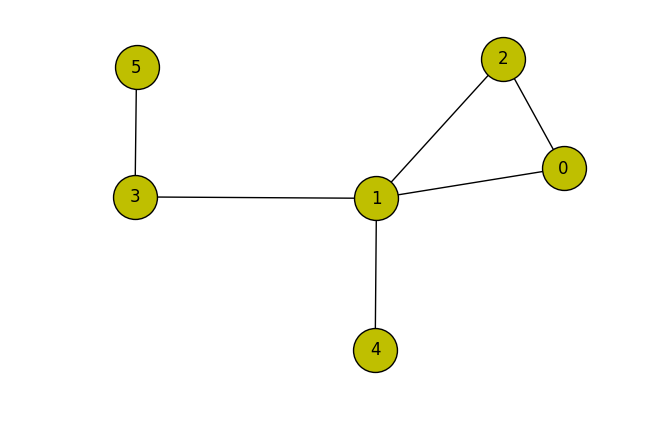

In [9]:
import networkx as nx
import numpy as np
%matplotlib inline
Adj = np.array([[0, 1, 1, 0, 0, 0], 
                [1, 0, 1, 1, 1, 0], 
                [1, 1, 0, 0, 0, 0], 
                [0, 1, 0, 0, 0, 1], 
                [0, 1, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0]])

G = nx.from_numpy_matrix(Adj)
nx.draw(G, node_color='y', node_size=1000, with_labels=True )

One measure of the importance of each node is its <b>centrality</b>.

We can count the number of paths of different lengths from $i$ to $i$,  
and add them up to get **centrality** of the node

$$c(i) = \alpha_1 A_{ii} + \alpha_2 A^2_{ii} + \alpha_3 A^3_{ii} + \cdots,$$

where the coefficients $\alpha_k$ remain to be chosen.  

With $\alpha_k = \frac{1}{k!}$ we get  

$$
    c = \mathrm{diag}(\exp(A))
$$

In [11]:
import scipy.linalg as sla
import numpy as np
centralities = np.diag(sla.expm(np.array(Adj, dtype=np.double)))
nodeorder = np.argsort(centralities)[::-1]

print np.array([nodeorder, centralities[nodeorder]])


# Note: This is already built into networkx using the following command
# print nx.communicability_centrality_exp(G)

[[ 1.          2.          0.          3.          4.          5.        ]
 [ 4.44723536  2.86427609  2.86427609  2.36018456  1.71615913  1.59432922]]


## Other matrix functions

Now, let us briefly talk about **other** matrix functions

## Sign function

Sign function is defined as

$$\mathrm{sign}(x) = \begin{cases} 1, \quad x > 0, \\ -1, \quad x < 0. \end{cases}$$

Given a matrix $A = U \Lambda U^*$, it effectively puts all the eigenvalues larger than $0$ to $1$, and all eigenvalues smaller than $0$ to $-1$, thus

$$P = \frac{(I + \mathrm{sign}(A))}{2}$$

is a **projector** onto the subspace spanned by all positive eigenvalues. 

Such projectors can be very useful in **large-scale** eigenvalue computations, when you only need to find a subspace.

## How to compute sign function?

There is a very simple iteration to compute the sign function, namely

$$X_{k+1} = \frac{1}{2} (X_k + X^{-1}_k), X_0 = \alpha A.$$

This iteration converges quadratically to the sign function.

You can also get a polynomial iteration, [proposed by R. Byers](http://www.sciencedirect.com/science/article/pii/0024379587902229)

$$X_{k+1} = \frac{1}{2} X_k (3 I - X_k), \quad X_0 = \alpha A.$$

## Matrix sign function: applications

One of the important applications of the matrix sign function is the solution of the **Algebraic Riccati equation**

$$A^* X + X A - X R X + G = 0,$$

which arises in optimal control and stochastic control.

Solving **ARE** is equivalent to finding a **stable** invariant subspace (i.e., corresponding to the negative eigenvalues)

of the matrix

$$
    C = \begin{bmatrix} A^* & G \\ R & -A \end{bmatrix}.
$$

## Inverse square root of the matrix

The inverse square root of the matrix, $A^{-1/2}$ is also often important.

For example, the multidimensional Gaussian distribution with covariance matrix $A = A^* > 0$ is given by the 

$$e^{A^{-1} x, x},$$

Suppose $x$ is really huge (millions), how we **generate samples**, given a structured matrix $A$?

The simplest algorithm is to generate a normally distributed vector $y$ with $y_i$ from $N(0, 1)$, and then compute

$$x = A^{-\frac{1}{2}} y.$$

The vector $x$ will have the desired distribution.

To compute matrix square root it is very efficient to use **rational Krylov subspaces.**

## Matrix equations

Now let us talk about matrix equations. 

An equation of the form $F(X) = G, \quad X \in \mathbb{R}^{n \times m}$ is called **matrix equation**.

A linear matrix equation is when $X$ and $G$ are matrices, and $F$ is a linear operator.

## Two important matrix equations

We will discuss two matrix equations:

First, is the **Sylvester equation** of the form

$$ A X + X B = C,$$

where $A$ and $B$ are given, and its special case, **continious Lyapunov equation**,

$$ A X + XA^{\top} = C,$$

and 

**discrete Lyapunov equation**

$$A X A^* - X = C. $$

## Application of the Lyapunov equation

Lyapunov equation is very important for the stability of dynamical systems, and also for model order reduction.

$$\frac{dy}{dt} = Ay, \quad y(0) = y_0,$$

$$y(t) \rightarrow 0$$ for $t \rightarrow \infty$.

System is stable, iff for any $Q = Q^* > 0$ there exists a unique positive definite solution $P$ of the Lyapunov equation

$$A P + P A^* = Q.$$

The stability then can be checked without finding eigenvalues.

## Application to model order reduction

Model order reduction of linear time-invariant systems:

$$\frac{dx}{dt} = Ax + Bu, \quad y = C x,$$

where $x$ is **state**, $u$ is control, and $y$ is the observable. We want to approximate it by a smaller-dimensional linear system

$$
   \frac{d\widehat{x}}{dt} = \widehat{A} \widehat{x} + \widehat{B} u, \quad y = \widehat{C} \widehat{x},
$$
in such a way that the output of the reduced system is close to the output of the original (big one).

The optimal $\widehat{A}, \widehat{B}, \widehat{C}$ can be recovered from the solution of the auxiliary Lyaupunov equations.

## Solution of the Sylvester equation

$$ A X + X B = C,$$

This is a system of linear equations for $X$.

It can be rewritten as a linear system using the **vec** and **Kronecker product** operations.

First, we introduce the $\mathrm{vec}$ operation by taking the element of a matrix into a one long vector.

## Kronecker product

A Kronecker product of two matrices $A \in \mathbb{R}^{n_1 \times m_1}, \quad B \in \mathbb{R}^{n_2 \times m_2}$ is a matrix $C$ of size $(n_1 n_2) \times (m_1 m_2)$.

Of the block form

$$A \otimes B = [a_{ij} B].$$

## Main property of the Kronecker product and vec

We have

$$\mathrm{vec}(A X B^{\top}) = (B \otimes A) \mathrm{vec}(X).$$

## Rewriting the Sylvester equation

$$\mathrm{vec}(A X B^{\top}) = (B \otimes A) \mathrm{vec}(X).$$

We can use it to rewrite the Sylvester equation

$$ A X + X B = C $$ 

in the form

$$\mathrm{vec}(AX  + X B) =  (I \otimes A + B^{\top} \otimes I) \mathrm{vec}(X) = \mathrm{vec}(C).$$

Thus, we need to solve a linear system with the matrix 

$$(I \otimes A + B^{\top} \otimes I)$$

It is a matrix of size $n^2$, thus Gaussian elimination will take $\mathcal{O}(n^6)$ operations.

We can do it in $\mathcal{O}(n^3)$ operations!

## Solving Sylvester equation: Bartels-Stewart method
$$(I \otimes A + B^{\top} \otimes I) x = c.$$

Let us compute Schur decomposition of $A$ and $B$:

$$A = Q_A T_A Q^*_A, \quad B^{\top} = Q_B T_B Q^*_B.$$

Then, we have

$$(I \otimes A + B^{\top} \otimes I) = (I \otimes ( Q_A T_A Q^*_) ) + (Q_B T_B Q^*_) \otimes I) = (Q_B \otimes Q_A) ( I \otimes T_A + T^{\top}_B \otimes I) (Q^* _B \otimes Q^*_A). $$

We have 

$$(Q_B \otimes Q_A)^{-1} = Q^*_B \otimes Q^*_A,$$

thus we only need to solve an auxiliary linear system with the matrix  $$I \otimes T_A + T^{\top}_B \otimes I.$$

Note, that if $A$ and $B$ are Hermitian, then $T_A$ and $T_B$ are diagonal, and this matrix is diagonal!

## Solving a final system

We have the system 

$$(I \otimes T_A + T_B \otimes I) z = g,$$

in the matrix form:

$$T_A Z + Z T^{\top}_B = G.$$

Then we just write the equation elementwise and see that the equations are solved successively for $Z_{11}, Z_{21}, \ldots, $.

## Take home message

- Matrix functions: matrix exponential, methods to compute matrix exponential, other matrix functions
- Matrix equations (Lyapunov equations, Sylvester equation)

## Tomorrow
- Final lecture; we will talk about multilinear algebra and tensors

## Tomorrow

- We will talk about **tensors**

In [21]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()